<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# We will fix a random seed for reproducibility:
seed = 11
np.random.seed(seed)

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn

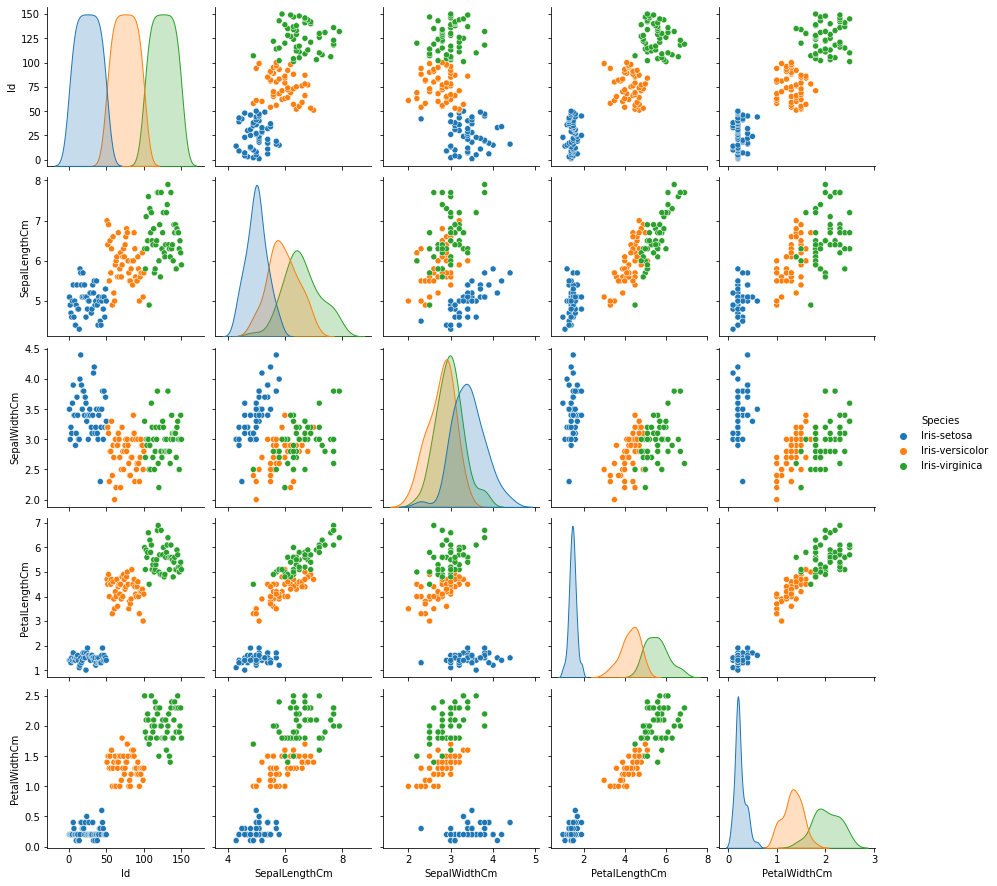

In [6]:
sn.pairplot(df.dropna(),hue='Species')

In [7]:
df.groupby(by=['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

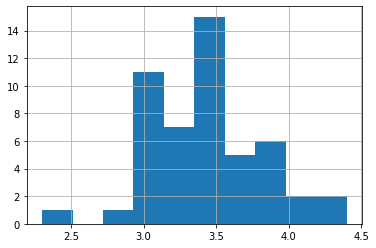

In [9]:
df.loc[df['Species']=='Iris-setosa','SepalWidthCm'].hist()

Values less than 2.5 are outliers so these can be dropped.

In [10]:
df=df.loc[(df['Species']!='Iris-setosa') | (df['SepalWidthCm']>=2.5),: ]

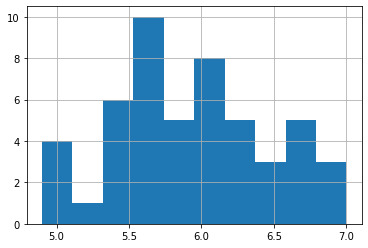

In [11]:
#Iris versicolor values below zero
df.loc[(df['Species']=='Iris-versicolor'),'SepalLengthCm'].hist()

In [12]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

# Exploratory Data Analysis

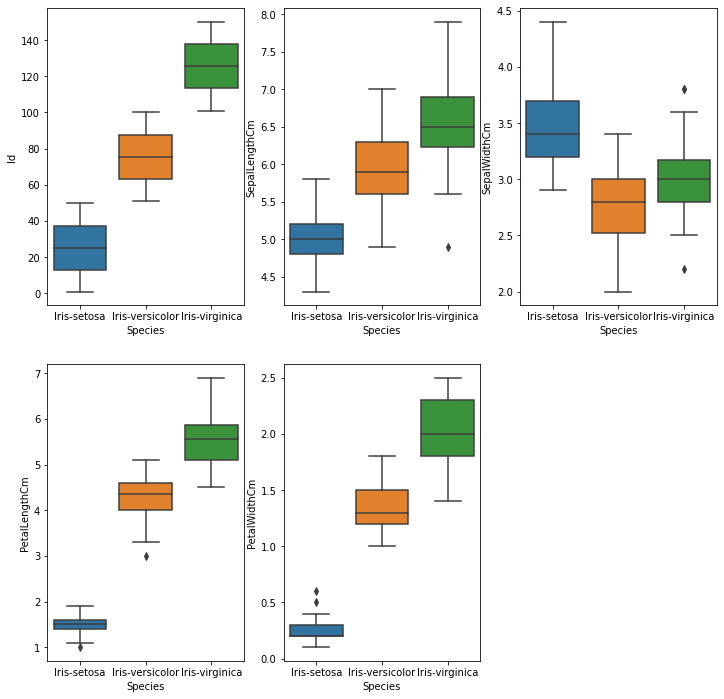

In [13]:
plt.figure(figsize=(12,12))
for colindex,col in enumerate(df.columns):
  if col=='Species' :
    continue
  plt.subplot(2,3,1+colindex)
  sn.boxplot(x='Species',y=col,data=df)

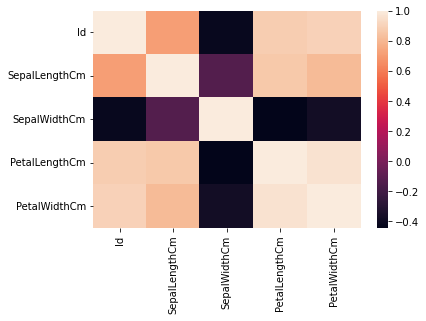

In [14]:
sn.heatmap(df.corr())

In [15]:
from sklearn.model_selection import train_test_split
X=df.drop(['Species'],axis=1)
y=df.Species

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Decison_tree_model=DecisionTreeClassifier()
Decison_tree_model.fit(X_train,y_train)
y_pred=Decison_tree_model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([0.95833333, 0.9625    , 0.96666667, 0.97083333, 0.975     ,
        0.97916667, 0.98333333, 0.9875    , 0.99166667, 0.99583333,
        1.        ]),
 <a list of 10 Patch objects>)

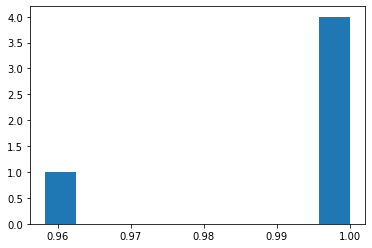

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier()
cv_scores=cross_val_score(model,X_train,y_train)
plt.hist(cv_scores)

(array([1., 0., 0., 0., 7., 0., 0., 0., 1., 1.]),
 array([0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
        0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
        0.75      ]),
 <a list of 10 Patch objects>)

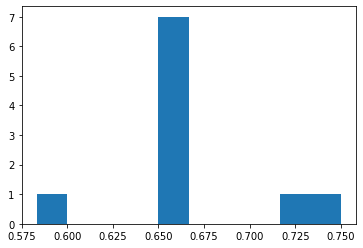

In [18]:
model1=DecisionTreeClassifier(max_depth=1)
cv_scores=cross_val_score(model1,X_train,y_train,cv=10)
plt.hist(cv_scores)

In [20]:
#Grid search for best parameters
from sklearn.model_selection import GridSearchCV
model3=DecisionTreeClassifier()
parameter_grid={'criterion' : ['gini','entropy'],
                'splitter'  : ['best', 'random'],
                'max_depth' : [1,2,3,4,5],
                'max_features' : [1,2,3,4],
                }
cross_validation=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(model3, param_grid= parameter_grid, cv=cross_validation)
grid_search.fit(X_train,y_train)

print('Best tree {}'.format(grid_search.best_estimator_))
print('Best paramters', grid_search.best_params_)
print('Best score',grid_search.best_score_)

Best tree DecisionTreeClassifier(max_depth=3, max_features=3)
Best paramters {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}
Best score 0.9916666666666666
